In [1]:
"""
  Sofía Almeida Bruno
  Análisis exploratorio de datos
  https://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits
"""

'\n  Sofía Almeida Bruno\n  Análisis exploratorio de datos\n  https://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
# Leemos los datos de los ficheros
train = np.genfromtxt('./datos/optdigits.tra',  delimiter = ",")
test = np.genfromtxt('./datos/optdigits.tes',  delimiter = ",")
print(train)

[[ 0.  1.  6. ...  0.  0.  0.]
 [ 0.  0. 10. ...  0.  0.  0.]
 [ 0.  0.  8. ...  0.  0.  7.]
 ...
 [ 0.  0.  3. ...  0.  0.  6.]
 [ 0.  0.  6. ...  5.  0.  6.]
 [ 0.  0.  2. ...  0.  0.  7.]]


In [4]:
X_train = train[:,0:-1]
y_train = train[:,-1]
X_train.shape

(3823, 64)

In [5]:
y_train.shape

(3823,)

In [6]:
X_test= test[:,0:-1]
y_test = test[:,-1]
X_test.shape

(1797, 64)

In [7]:
# Vemos cuáles son las clases
np.unique(y_train)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

(array([376., 389., 380., 389., 387., 376., 377., 387., 380., 382.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

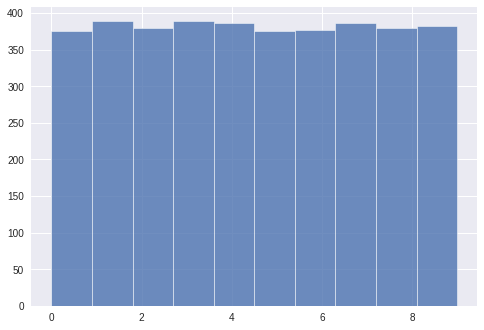

In [8]:
plt.hist(y_train, edgecolor='white', linewidth=0.6, alpha = 0.8)

([<matplotlib.axis.XTick at 0x7f925d1d2970>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9')])

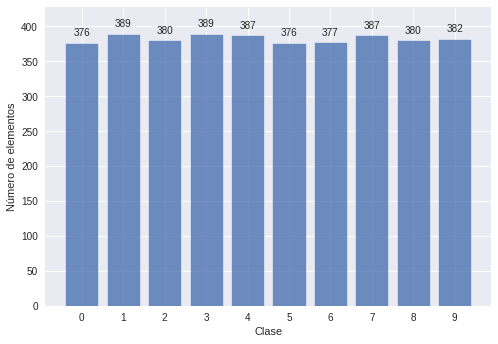

In [19]:
unique, counts = np.unique(y_train, return_counts=True)
ax = plt.bar(unique, counts, edgecolor='white', linewidth=0.6, alpha = 0.8)
def autolabel(rects, ax):
    for rect in rects:
        x = rect.get_x() + rect.get_width()/2.
        y = rect.get_height()
        plt.annotate("{}".format(y), (x,y), xytext=(0,5), textcoords="offset points",
                    ha='center', va='bottom')

autolabel(ax.patches,ax)

plt.margins(y=0.1)
plt.xlabel('Clase')
plt.ylabel("Número de elementos")
plt.xticks(unique, range(0,10))
#plt.savefig('./fig/class_dist.pdf')

In [11]:
import seaborn as sns
import pandas as pd
# Correlation matrix
def plotCorrelationMatrix(df):
    filename = df.name
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1, cmap = 'PiYG')
    #plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    #plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
    #plt.savefig("../fig/corr_matrix" + filename + ".pdf")
    plt.clf()

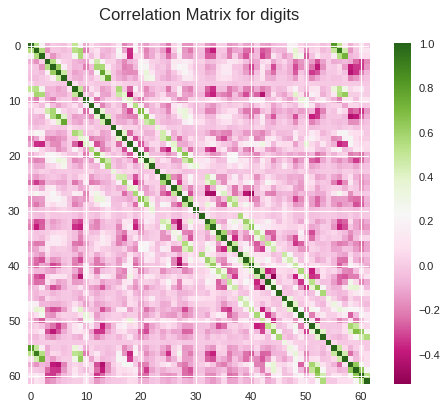

<Figure size 576x396 with 0 Axes>

In [12]:
df = pd.DataFrame(X_train)
df.name = 'digits'
plotCorrelationMatrix(df)

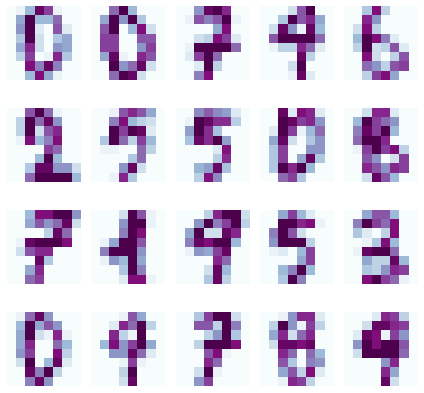

In [17]:
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(6, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, i in zip(axs.flat, range(0, 20)):
    ax.imshow(X_train[i,:].reshape(8,8), cmap='BuPu')

plt.tight_layout()
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [9]:
poly = PolynomialFeatures(2)
X = poly.fit_transform(X_train)
print("Tras poly: ", X.shape)

scale = StandardScaler()
X = scale.fit_transform(X)
print("Tras scale: ", X.shape)

# Seleccionamos variables utilizando lasso
lasso = LassoCV(n_jobs = -1, max_iter = 55000, verbose = True, cv = 5)
X = SelectFromModel(lasso).fit_transform(X, y_train)
print("Tras lasso: ", X.shape)


Tras poly:  (3823, 2145)
Tras scale:  (3823, 2145)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.3min remaining:  1.9min
........[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished


Tras lasso:  (3823, 657)


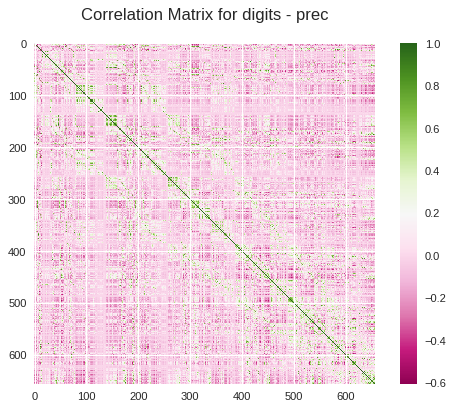

<Figure size 576x396 with 0 Axes>

In [12]:
df = pd.DataFrame(X)
df.name = 'digits - prec'
plotCorrelationMatrix(df)